In [1]:
print('hello world')

hello world


Group Members: Adrian, Aryan, Hon Joo

For this project, we have decided to go with a dataset containing 2018 flight data. While 2018 isn't the most up to date data,  data from parts of 2019 and 2020 onwards aren't reliable due to the Covid-19 pandemic. 


In [60]:
# Basic Libraries
!pip install missingno
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import missingno as msno 


In [61]:
flightdata = pd.read_csv("August 2018 Nationwide.csv")
flightdata_df = pd.DataFrame(flightdata)
flightdata.head()

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,...,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 28
0,2018-08-01,19805,N956AN,1587,12478,1247805,31703,JFK,14107,1410702,...,0.0,NaN,342.0,377.0,9.0,0.0,35.0,0.0,0.0,NaN
1,2018-08-01,19805,N973AN,1588,14107,1410702,30466,PHX,11618,1161802,...,0.0,NaN,285.0,309.0,0.0,0.0,53.0,0.0,0.0,NaN
2,2018-08-01,19805,N9006,1590,11042,1104205,30647,CLE,11298,1129806,...,0.0,NaN,176.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-08-01,19805,N870NN,1591,14843,1484306,34819,SJU,11298,1129806,...,0.0,NaN,304.0,303.0,43.0,0.0,0.0,0.0,0.0,NaN
4,2018-08-01,19805,N9023N,1593,10423,1042302,30423,AUS,13303,1330303,...,0.0,NaN,173.0,175.0,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
flightdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701352 entries, 0 to 701351
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FL_DATE                701352 non-null  object 
 1   OP_CARRIER_AIRLINE_ID  701352 non-null  int64  
 2   TAIL_NUM               699449 non-null  object 
 3   OP_CARRIER_FL_NUM      701352 non-null  int64  
 4   ORIGIN_AIRPORT_ID      701352 non-null  int64  
 5   ORIGIN_AIRPORT_SEQ_ID  701352 non-null  int64  
 6   ORIGIN_CITY_MARKET_ID  701352 non-null  int64  
 7   ORIGIN                 701352 non-null  object 
 8   DEST_AIRPORT_ID        701352 non-null  int64  
 9   DEST_AIRPORT_SEQ_ID    701352 non-null  int64  
 10  DEST_CITY_MARKET_ID    701352 non-null  int64  
 11  DEST                   701352 non-null  object 
 12  CRS_DEP_TIME           701352 non-null  int64  
 13  DEP_TIME               687789 non-null  float64
 14  DEP_DELAY              687153 non-nu

We have 701352 flights in the dataset, which is a hefty amount. We noticed that some of the columns have many missing values. 

For example, for flights with weather delay (WEATHER_DELAY), there's only 157214 data points. Although, it is still a significant number.

We can use missingno library to visually represent the missing values in each column.

<AxesSubplot:>

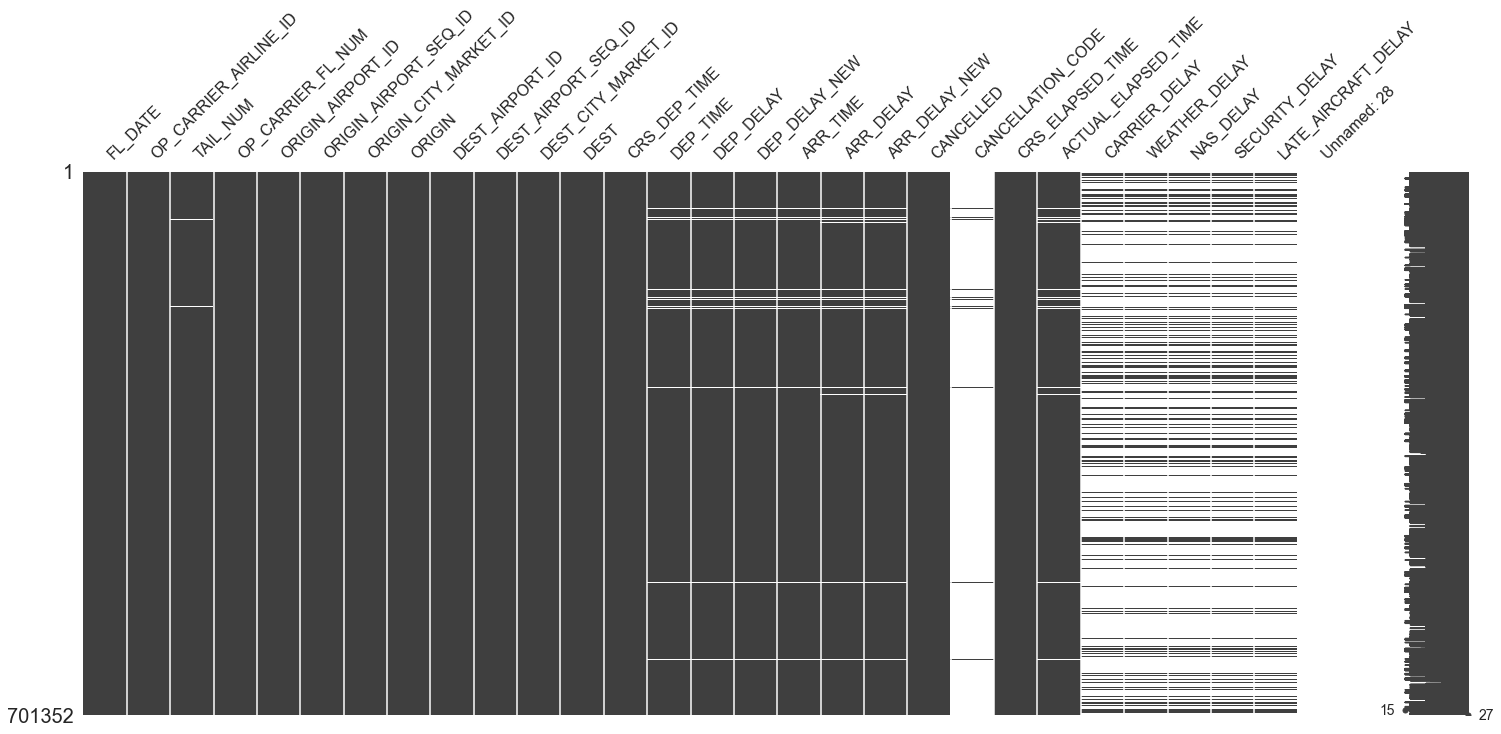

In [63]:
msno.matrix(flightdata)

We'll check the columns of CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY against ARR_DELAY and DEP_DELAY to see if there any relation

In [64]:
flightdata[['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','ARR_DELAY','DEP_DELAY']].head(20)

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,ARR_DELAY,DEP_DELAY
0,9.0,0.0,35.0,0.0,0.0,44.0,9.0
1,0.0,0.0,53.0,0.0,0.0,53.0,29.0
2,NaN,NaN,NaN,NaN,NaN,-2.0,-3.0
3,43.0,0.0,0.0,0.0,0.0,43.0,44.0
4,NaN,NaN,NaN,NaN,NaN,-2.0,-4.0
5,NaN,NaN,NaN,NaN,NaN,-7.0,-10.0
6,NaN,NaN,NaN,NaN,NaN,5.0,-1.0
7,NaN,NaN,NaN,NaN,NaN,-13.0,-6.0
8,NaN,NaN,NaN,NaN,NaN,-5.0,-2.0
9,NaN,NaN,NaN,NaN,NaN,1.0,-10.0


We pick out 20 data to take a quick look. Naively, it seems like the sum of all the delays equates to ARR_DELAY. This means that the arrival delay is split into the different types of delays that accumulate. 



To clean the data, we chose certain criteria to drop rows by.

-no data in arrival delay column

-no data in departure delay column 

In [67]:
flightdata_df = flightdata_df.dropna(subset = ['ARR_DELAY']).reset_index(drop = True)
flightdata_df = flightdata_df.dropna(subset = ['DEP_DELAY']).reset_index(drop = True)

In [68]:
flightdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683936 entries, 0 to 683935
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FL_DATE                683936 non-null  object 
 1   OP_CARRIER_AIRLINE_ID  683936 non-null  int64  
 2   TAIL_NUM               683936 non-null  object 
 3   OP_CARRIER_FL_NUM      683936 non-null  int64  
 4   ORIGIN_AIRPORT_ID      683936 non-null  int64  
 5   ORIGIN_AIRPORT_SEQ_ID  683936 non-null  int64  
 6   ORIGIN_CITY_MARKET_ID  683936 non-null  int64  
 7   ORIGIN                 683936 non-null  object 
 8   DEST_AIRPORT_ID        683936 non-null  int64  
 9   DEST_AIRPORT_SEQ_ID    683936 non-null  int64  
 10  DEST_CITY_MARKET_ID    683936 non-null  int64  
 11  DEST                   683936 non-null  object 
 12  CRS_DEP_TIME           683936 non-null  int64  
 13  DEP_TIME               683936 non-null  float64
 14  DEP_DELAY              683936 non-nu

Now, we have trimmed the dataset slightly to just 683936 rows. 

We shall explore the columns to check out it's mean/median data to look for outliers. The pertinent columns would be delay data, so we shall look at those. 

In [71]:
flightdata_df[['ARR_TIME','ARR_DELAY_NEW','DEP_DELAY_NEW','DEP_DELAY','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']].describe()

,ARR_TIME,ARR_DELAY_NEW,DEP_DELAY_NEW,DEP_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,683936.000000,683936.000000,683936.000000,683936.000000,157177.000000,157177.000000,157177.000000,157177.000000,157177.000000
mean,1451.153810,17.566389,16.924369,13.854184,19.617043,4.031143,19.177742,0.076633,29.067255
std,547.957243,50.341275,50.137140,51.291342,59.559360,28.049546,42.347003,2.371353,54.231356
min,1.000000,0.000000,0.000000,-57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1038.000000,0.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1453.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,4.000000,0.000000,4.000000
75%,1912.000000,12.000000,10.000000,10.000000,17.000000,0.000000,22.000000,0.000000,37.000000
max,2400.000000,1843.000000,1855.000000,1855.000000,1843.000000,1165.000000,1255.000000,363.000000,1413.000000


As we can see, for the row 'max', some of the delays(min) are in the thousands! They would definitely be classed as outliers. 

We will be removing them during EDA. 